## Lasso regression algorithm
### lasso loss : $$ ||Y - Xw||_{2}^{2} + \lambda \sum_{i}|w_{i}|$$

In [35]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.linear_model import Lasso

In [2]:
data_set = load_boston()
X_dataset = pd.DataFrame(data_set['data'],columns=data_set['feature_names'])
Y_dataset = pd.Series(data_set['target'])

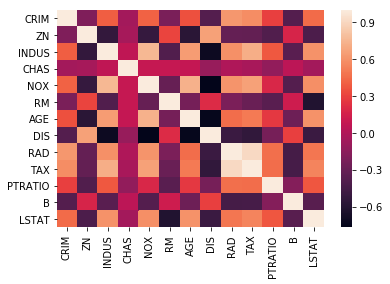

In [3]:
sns.heatmap(X_dataset.corr())
plt.show()

In [85]:
class Lasso_Regression():

    def __init__(self,alpha,epsilon,max_iteration):
        self.alpha = alpha
        self.epsilone = epsilon
        self.max_iteration = max_iteration
        self.iteration = 0
        self.predictor_index = -1
        self.beta_hist = []


    def fit(self , X_dataset, Y_dataset):
        
        self.coef_ = np.zeros((X_dataset.shape[1],1))
        self.beta_hist.append(self.coef_.T[0])
        self.predictors = list(X_dataset.columns)
        non_nul_coef = []
        correlation_vector = X_dataset.corrwith(Y_dataset)
        predictor = abs(correlation_vector).sort_values().index[-1]
        new_predictor_index_1 = self.predictors.index(predictor)
        direction = correlation_vector[self.predictors[new_predictor_index_1]]/abs(correlation_vector[self.predictors[new_predictor_index_1]])
        dico_direction_coef = {"direction" :direction,
                            "coef" : self.predictors[new_predictor_index_1]}
        self.coef_[new_predictor_index_1] = self.epsilone*direction
        non_nul_coef.append(dico_direction_coef["coef"])
        Y_dataset.values.reshape(-1,1) -X_dataset.values.dot(self.coef_)
        non_nul_coef.append(dico_direction_coef["coef"])
        Y_dataset.values.reshape(-1,1) -X_dataset.values.dot(self.coef_)
        i = -1
        iteration = 0


        while (sum(abs(self.coef_))<self.alpha) and (iteration < self.max_iteration):
            
            iteration +=1
            hist = copy.deepcopy(self.coef_.T[0])
            self.beta_hist.append(hist)
            old_correlation = deepcopy(correlation_vector[self.predictors[new_predictor_index_1]])
            residual = Y_dataset.values.reshape(-1,1) -X_dataset.values.dot(self.coef_)
            correlation_vector = X_dataset.corrwith(pd.Series(residual.T[0]))
            predictor = abs(correlation_vector).sort_values().index[i]
            new_predictor_index = self.predictors.index(predictor)
            direction = correlation_vector[self.predictors[new_predictor_index]]/abs(correlation_vector[self.predictors[new_predictor_index]])
            dico_direction_coef = {"direction" :direction,
                                    "predictor" : self.predictors[new_predictor_index],
                                    "coef_value" : correlation_vector[self.predictors[new_predictor_index]]}
            self.coef_[new_predictor_index] += self.epsilone*direction
            
            if abs(dico_direction_coef["coef_value"])>abs(old_correlation) :

                i-=1
                correlation_vector = X_dataset.corrwith(pd.Series(residual.T[0]))
                predictor = abs(correlation_vector).sort_values().index[i]
        
        self.beta_hist = self.beta_hist[1:]
        self.columns = X_dataset


    @staticmethod
    def predict(self,X_dataset):
        return np.dot(X_dataset,self.coef_)

In [86]:
model = Lasso_Regression(alpha = 1,epsilon=0.01,max_iteration=1000)
model.fit(X_dataset,Y_dataset)

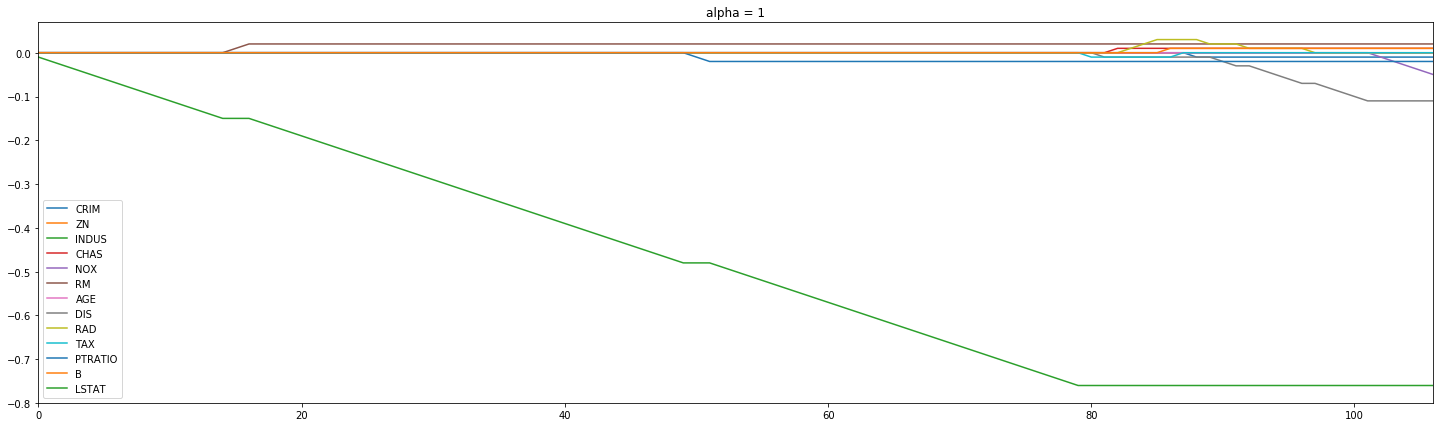

In [87]:
df = pd.DataFrame(np.array(model.beta_hist), columns= model.columns.columns)
df.plot(figsize = (25,7) , title = 'alpha = 1')
plt.show()

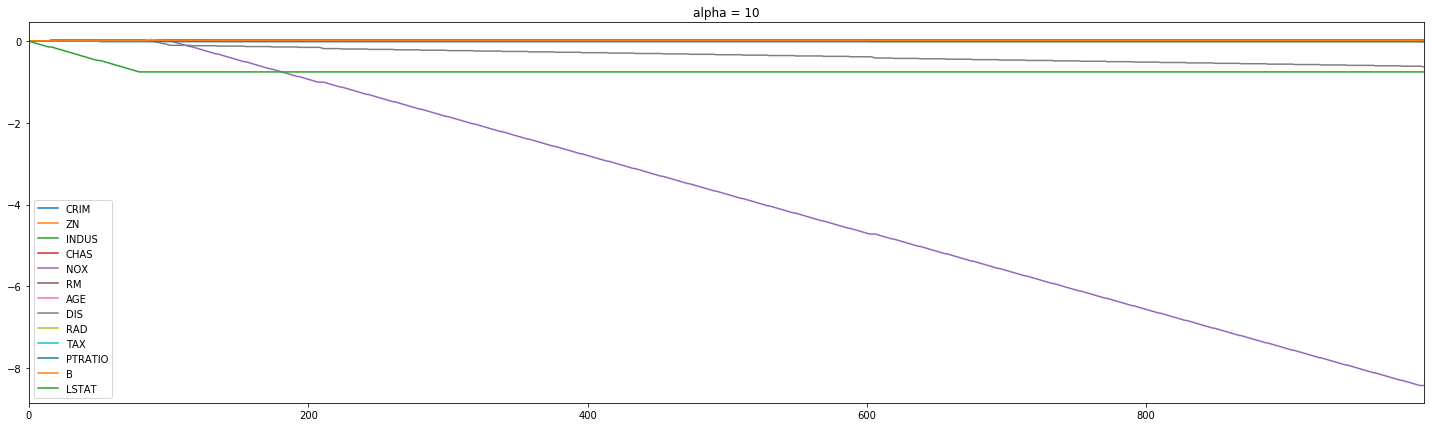

In [90]:
alpha = 10
model = Lasso_Regression(alpha = alpha,epsilon=0.01,max_iteration=1000)
model.fit(X_dataset,Y_dataset)
df = pd.DataFrame(np.array(model.beta_hist), columns= model.columns.columns)
df.plot(figsize = (25,7) , title = f'alpha = {alpha}')
plt.show()

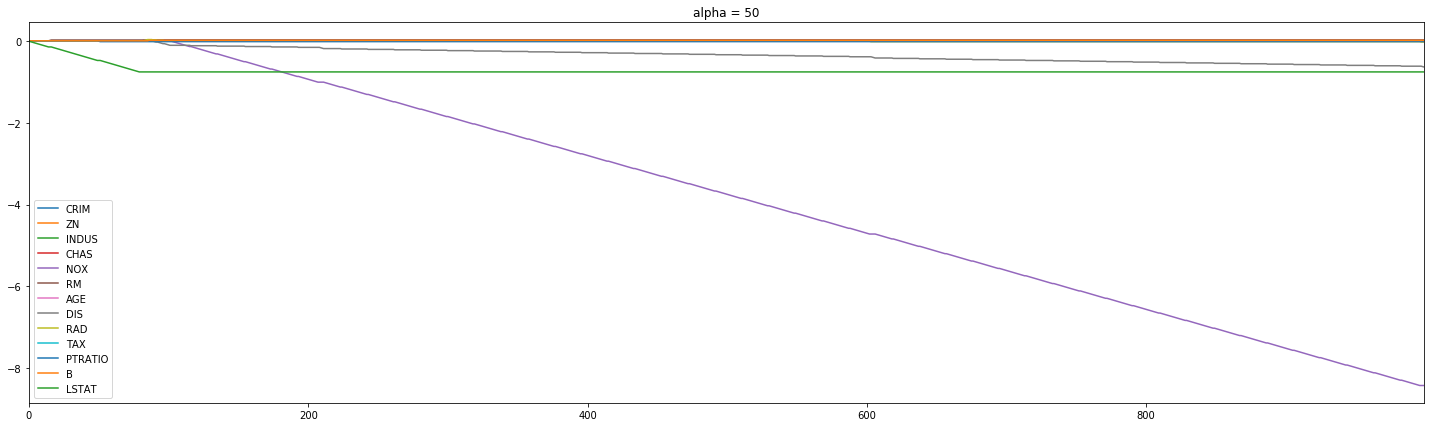

In [91]:
alpha = 50
model = Lasso_Regression(alpha = alpha,epsilon=0.01,max_iteration=1000)
model.fit(X_dataset,Y_dataset)
df = pd.DataFrame(np.array(model.beta_hist), columns= model.columns.columns)
df.plot(figsize = (25,7) , title = f'alpha = {alpha}')
plt.show()